# <center><u><font color='red'> Prédiction des émissions  de CO2</font></u></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
 
from functions import utils
import math
from sklearn.svm import SVR
from functions.functions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
target_col='SiteEnergyUse(kBtu)'

In [3]:
df=pd.read_csv('data/cleaned_and_normalized.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalGHGEmissions    1102 non-null   float64
 1   NaturalGas(kBtu)     1102 non-null   float64
 2   SiteEnergyUse(kBtu)  1102 non-null   float64
 3   ENERGYSTARScore      1102 non-null   float64
 4   NumberofBuildings    1102 non-null   float64
 5   age                  1102 non-null   float64
 6   volume               1102 non-null   float64
dtypes: float64(7)
memory usage: 60.4 KB


In [4]:
df.head()

,TotalGHGEmissions,NaturalGas(kBtu),SiteEnergyUse(kBtu),ENERGYSTARScore,NumberofBuildings,age,volume
0,90.01,0.998845,3663534.500,0.897972,-0.044665,-1.309627,1.846083
1,9.13,-0.797474,1310236.625,0.000000,-0.044665,0.893793,-0.120458
2,128.44,1.915530,4456714.500,-0.287828,-0.044665,-0.595843,0.907630
3,157.77,2.793199,4145920.500,0.000000,-0.044665,1.638611,0.510146
4,215.00,3.897615,6668568.500,-1.517546,-0.044665,-1.092389,0.835496


## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

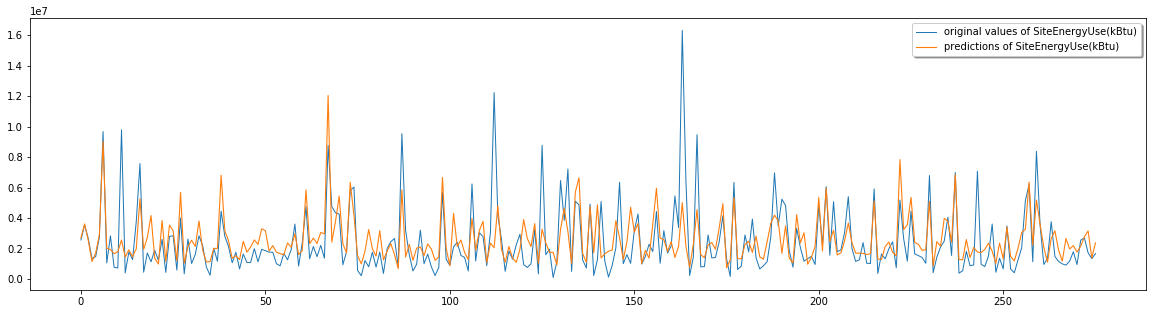

r_squared 0.41832722746111684
rmse 1696413.2401159503
coef [ 826596.94234278  103695.5175002  -310334.23961466 1123691.26755641]
feature_cols ['NaturalGas(kBtu)', 'NumberofBuildings', 'age', 'volume']


In [5]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]
r_squared,rmse,coefs=utils.linear_regression_func(df,target_col,feature_cols,test_size=0.25,random_state=42)

print('r_squared',r_squared)
print('rmse',rmse)
print('coef',coefs)
print('feature_cols',feature_cols)



R2 assez élevé de 92%, l'émission de gaz naturel a un effet très significatif sur l'émission de co2

#### 1-2  <u>Régression linéaire avec ENERGYSTARScore </u>

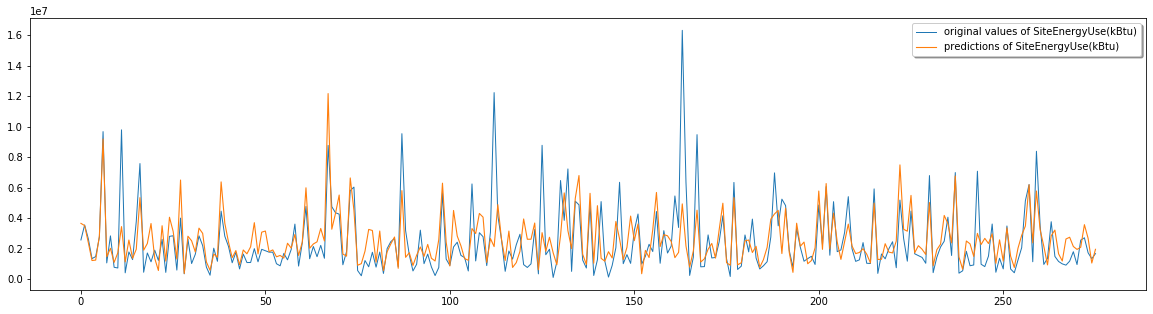

r_squared 0.4450872363586683
rmse 1656931.8370603544
coef [ 805609.17234148 -434875.25818583  106076.61317775 -277318.72596811
 1192548.25835334]
feature_cols ['NaturalGas(kBtu)', 'ENERGYSTARScore', 'NumberofBuildings', 'age', 'volume']


In [6]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' 
]
r_squared,rmse,coefs=utils.linear_regression_func(df,target_col,feature_cols,test_size=0.25,random_state=42)

print('r_squared',r_squared)
print('rmse',rmse)
print('coef',coefs)
print('feature_cols',feature_cols)

avec un R2 de 93% 

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

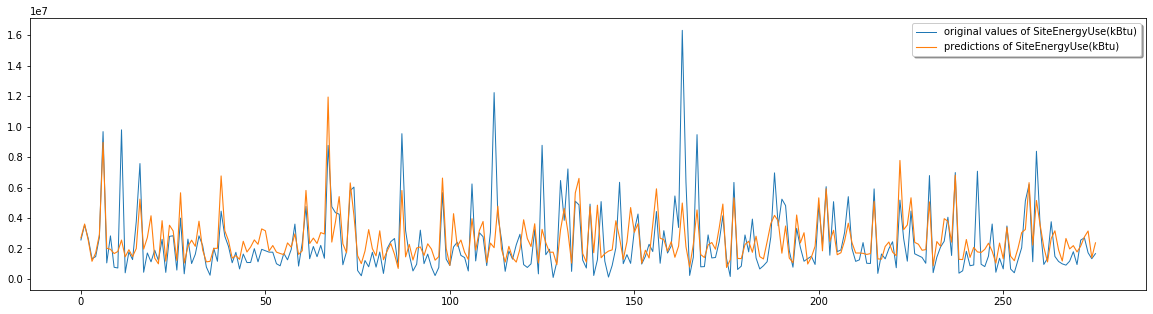

({'alpha': 10.0}, 0.42769026785988873, 1696003.7564024855)

In [7]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]
param_grid = [{'alpha' : np.array([10, 9, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.1, 0.01])}]


scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = Ridge(random_state=random_state)
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

#### 2-2 <u>Régression de ridge avec ENERGYSTARScore </u>

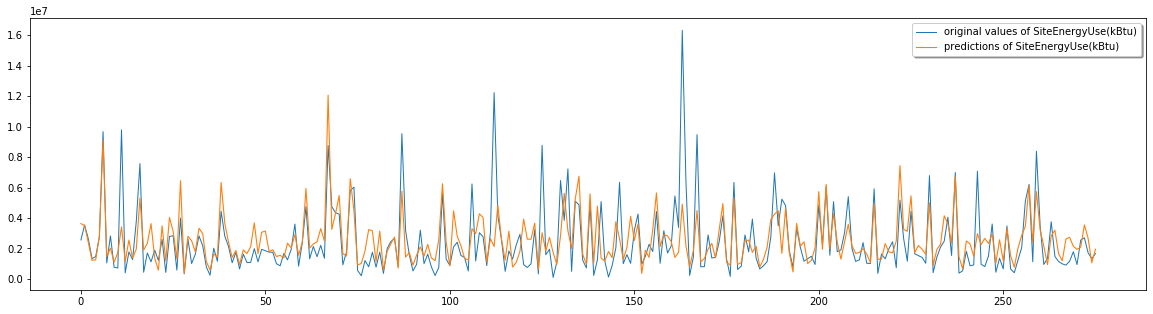

({'alpha': 10.0}, 0.46055093461568414, 1655989.6799652216)

In [8]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' 
]
param_grid = [{'alpha' : np.array([10, 9, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.1, 0.01])}]


scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = Ridge(random_state=random_state)
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

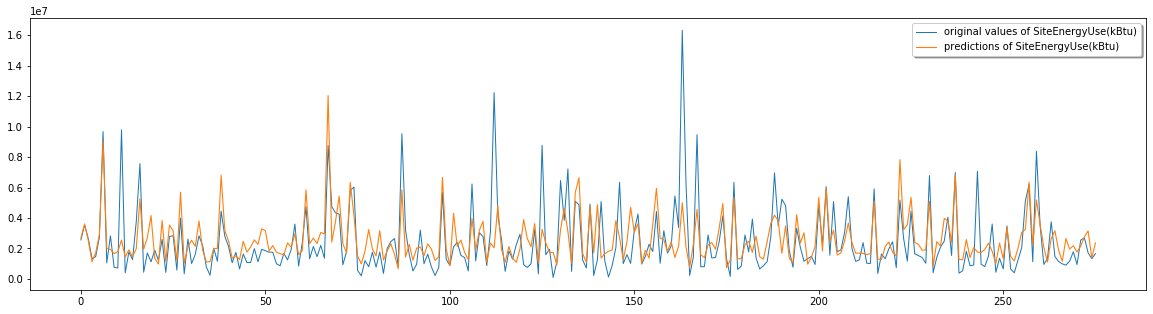

({'alpha': 10.0}, 0.4271238194244553, 1696411.9588555044)

In [9]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]
param_grid = [{'alpha' : np.array([10, 1, 0.1, 0.02, 0.01, 0.005, 0.001, 0.0005])}]


scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = Lasso( random_state=random_state)
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

#### 3-2 <u>Régression de Lasso avec ENERGYSTARScore </u>

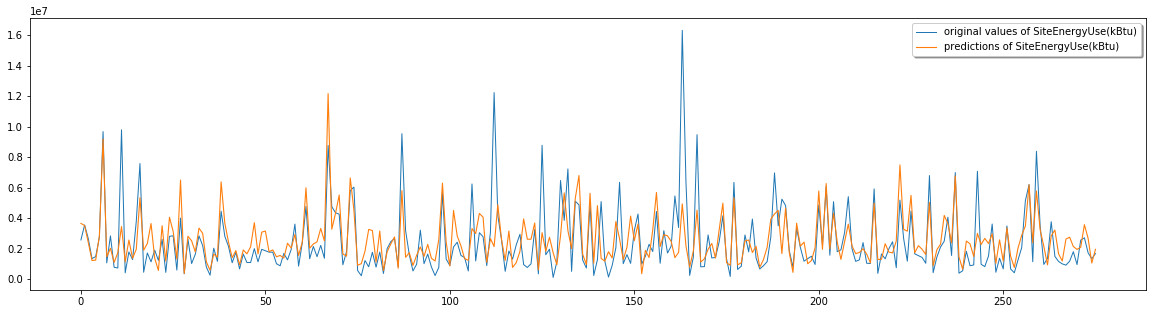

({'alpha': 10.0}, 0.459982985418649, 1656929.9465600129)

In [10]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)'
]
param_grid = [{'alpha' : np.array([10, 1, 0.1, 0.02, 0.01, 0.005, 0.001, 0.0005])}]


scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = Lasso( random_state=random_state)
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

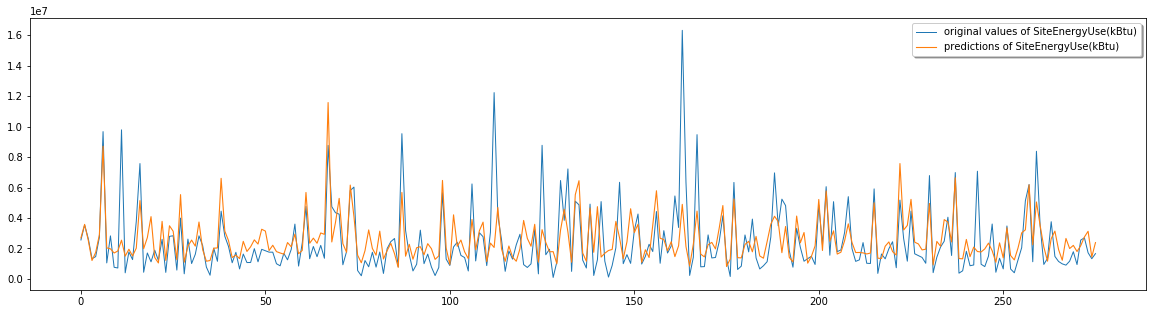

({'alpha': 0.1, 'l1_ratio': 0.42}, 0.4283296746853556, 1695733.523919893)

In [11]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]
param_grid = [{"alpha": [10, 1, 0.1, 0.01, 0.001],  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 2, 0.01)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge


scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = ElasticNet( random_state=random_state,normalize=False)
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

#### 4-2 <u>Régression de ElasticNet avec ENERGYSTARScore </u>

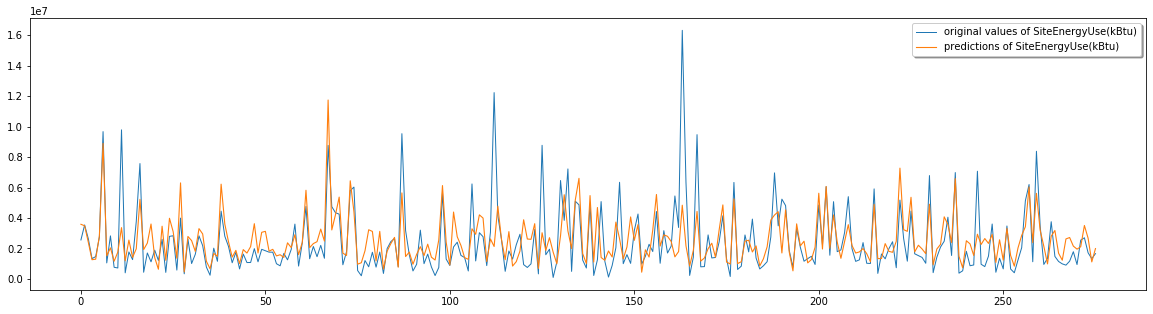

({'alpha': 0.1, 'l1_ratio': 0.5}, 0.46105188529614083, 1654348.1892101553)

In [12]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)'  
]
param_grid = [{"alpha": [10, 1, 0.1, 0.01, 0.001],  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 2, 0.01)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge


scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = ElasticNet( random_state=random_state,normalize=False)
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

### 5 <u>SVR support vector linear</u>

#### 5-1 <u>SVR sans ENERGYSTARScore </u>

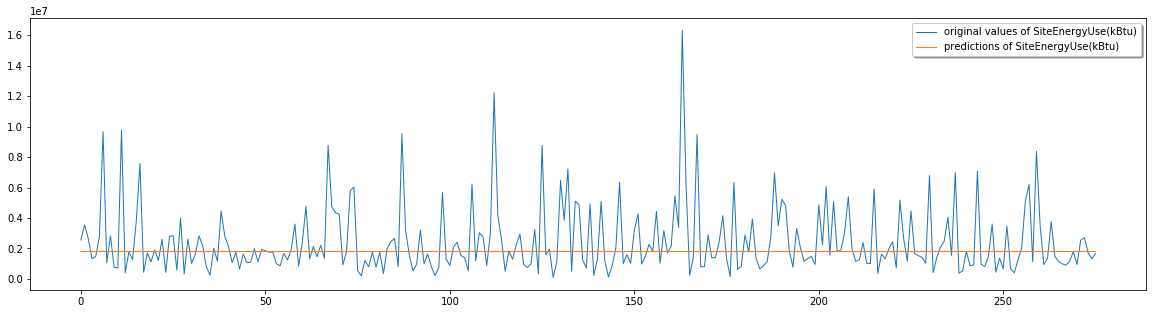

({'C': 0.99}, -0.12539962627122736, 2312992.500439953)

In [13]:
feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]


param_grid = { 'C' : np.arange(0.01, 1, 0.01)} #Paramètre de régulation : pénalité pour les données mal classées. Si C est grand l'algorithme choisira un hyperplan à marge plus faible si cet hyperplan permet de mieux classer tous les points. 
                                                #Si C est petit, l'algorithme choisira un hyperplan à marge plus importante même si cet hyperplan classe plus mal les points

# Choisir un score à optimiser
score = 'r2'


# define the model/ estimator
model = SVR( kernel = 'linear')
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

#### 5-2 <u>SVR avec ENERGYSTARScore </u>

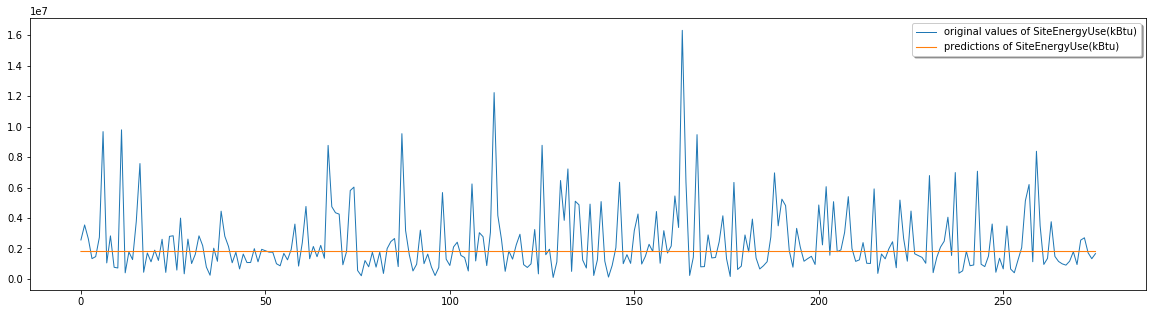

({'C': 0.99}, -0.12542729875328962, 2312994.540752241)

In [14]:
feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' 
]


param_grid = { 'C' : np.arange(0.01, 1, 0.01)} #Paramètre de régulation : pénalité pour les données mal classées. Si C est grand l'algorithme choisira un hyperplan à marge plus faible si cet hyperplan permet de mieux classer tous les points. 
                                                #Si C est petit, l'algorithme choisira un hyperplan à marge plus importante même si cet hyperplan classe plus mal les points

# Choisir un score à optimiser
score = 'r2'


# define the model/ estimator
model = SVR( kernel = 'linear')
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

Conclusion modèles linéaires: La régularisation Ridge avec le pramaètre alpha=1 reste le meilleur modèle, la prise en compte de ENERGYSTARScore comme variable explicative améliore les performance du modèle

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

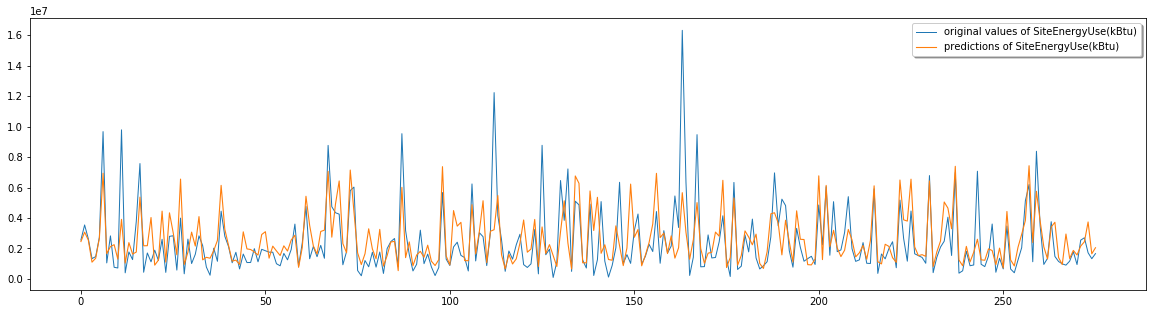

({'n_estimators': 140,
  'min_samples_split': 6,
  'min_samples_leaf': 8,
  'max_depth': 9},
 0.4531767100125725,
 1677738.527888662)

In [15]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]

# valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  np.arange(0, 500, 10),  #nombre d'arbres de décision
              'max_depth': np.arange(0, 50, 1), #nombre maximum de niveaux dans chaque arbre de décision 
              'min_samples_leaf': np.arange(1, 20, 1),   #nombre minimal d'observation pour créer une feuille
              'min_samples_split' : np.arange(1, 20, 1)} #nombre minimal d'observation avant séparation du noeud
scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = RandomForestRegressor(random_state=random_state)
utils.random_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

#### 1-2 <u>Random Forest avec ENERGYSTARScore </u>

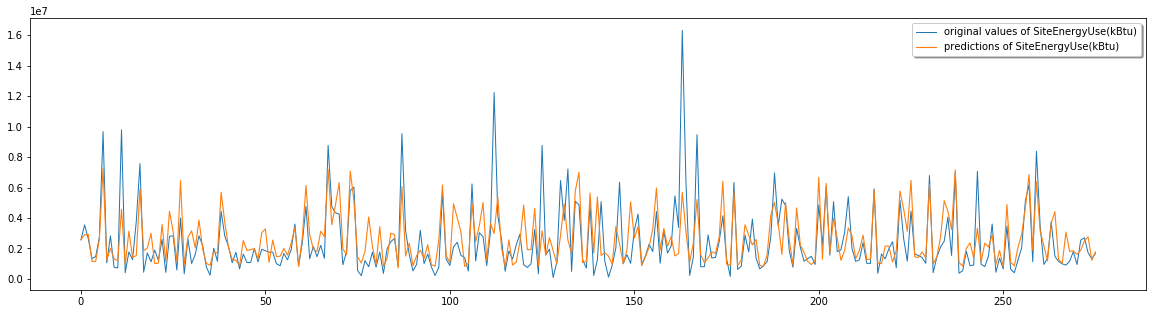

({'n_estimators': 470,
  'min_samples_split': 12,
  'min_samples_leaf': 10,
  'max_depth': 7},
 0.4819836122779379,
 1606904.4917725637)

In [16]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' 
]

# valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  np.arange(0, 500, 10),  #nombre d'arbres de décision
              'max_depth': np.arange(0, 50, 1), #nombre maximum de niveaux dans chaque arbre de décision 
              'min_samples_leaf': np.arange(1, 20, 1),   #nombre minimal d'observation pour créer une feuille
              'min_samples_split' : np.arange(1, 20, 1)} #nombre minimal d'observation avant séparation du noeud
scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = RandomForestRegressor(random_state=random_state)
utils.random_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

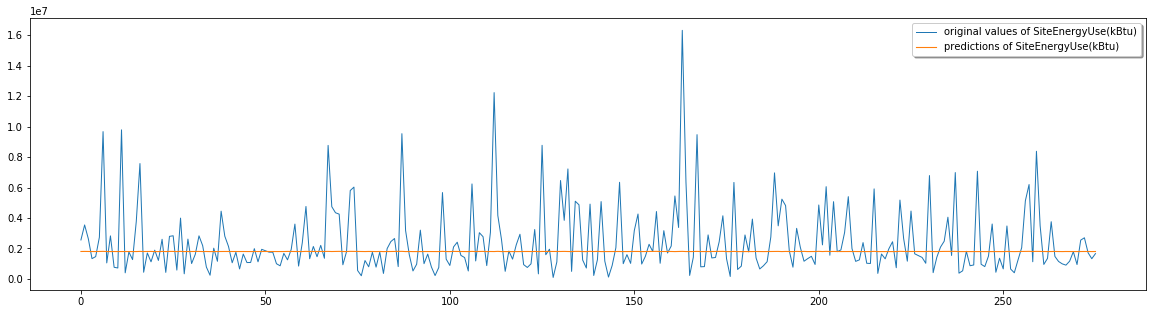

({'C': 95, 'epsilon': 0.01, 'gamma': 0.1},
 -0.12321791844708949,
 2310574.701866684)

In [17]:

feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]

param_grid = { 
    #Paramètre de régulation : pénalité pour les données mal classées. Si C est grand l'algorithme choisira un hyperplan à marge plus faible si cet hyperplan permet de mieux classer tous les points. 
                    #Si C est petit, l'algorithme choisira un hyperplan à marge plus importante même si cet hyperplan classe plus mal les points
    
              'epsilon' : [0.01, 0.05, 0.1, 1], #erreur tolérée par l'algorithme
    'C' : np.arange(60, 100, 5), 
        
              'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}    #Kernel coefficient : influence d'une données d'entrainement. gamma faible = donnée a un grand rayons d'influence sur d'autre point pour former une classe. gamma élevé = rayon faible donc les points doivent être proches pour former une classe.



scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = SVR( kernel = 'rbf')
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

### 2 <u>SVR NON Linéaire RBF</u>

 #### 2-1 <u>SVR sans ENERGYSTARScore </u>

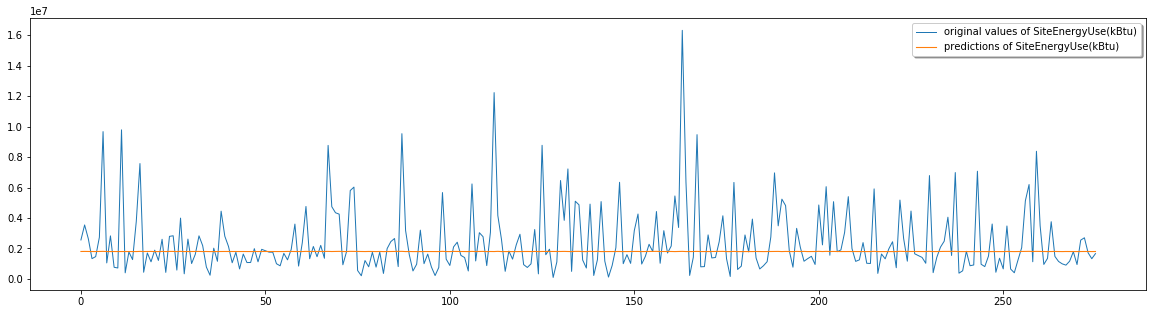

({'C': 95, 'epsilon': 0.01, 'gamma': 0.1},
 -0.12321791844708949,
 2310574.701866684)

In [18]:
feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' and col!='ENERGYSTARScore'
]
param_grid = { 
    
              'epsilon' : [0.01, 0.05, 0.1, 1], 
    'C' : np.arange(60, 100, 5), 
        
              'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}    



scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = SVR( kernel = 'rbf')
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)

 #### 2-2 <u>SVR avec ENERGYSTARScore </u>

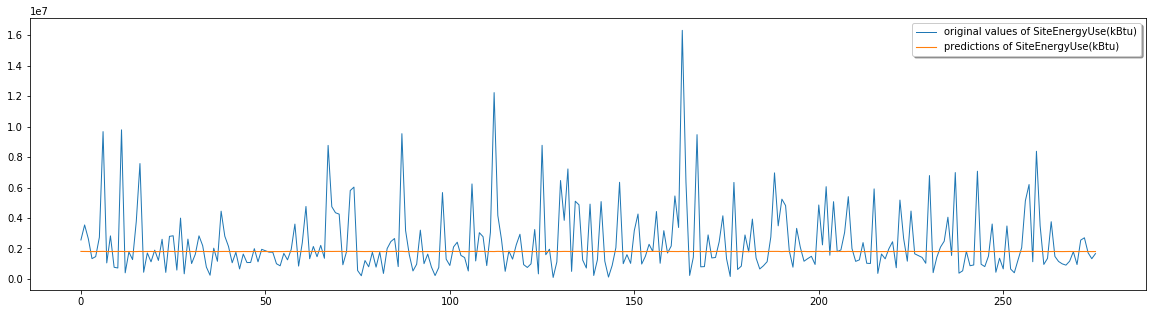

({'C': 95, 'epsilon': 0.01, 'gamma': 0.1},
 -0.12389988481809229,
 2310882.4218932246)

In [19]:
feature_cols=[
    
 col for col in df.columns.tolist() if col!='TotalGHGEmissions' and col!='SiteEnergyUse(kBtu)' 
]
param_grid = { 
    
              'epsilon' : [0.01, 0.05, 0.1, 1], 
    'C' : np.arange(60, 100, 5), 
        
              'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}    



scoring = 'r2'
cv=5
test_size=0.25
random_state=42
model = SVR( kernel = 'rbf')
utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv)